In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.shape

(891, 12)

In [ ]:
### Data preparation ###
train_y = train_data["Survived"]
train_X = train_data.copy()
test_X = test_data.copy()
train_X.drop(["Survived"],axis=1, inplace=True)

train_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_X.mode().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### Features preparation ###
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
## PassengerId ##
train_X.drop(["PassengerId"],axis=1, inplace=True)
test_X.drop(["PassengerId"],axis=1, inplace=True)

In [ ]:
## Cabin ##
def _get_cabin_prefix(cabin):
    return cabin[0]

def create_cabin_features(df):
    df['Cabin'].fillna('-', inplace = True)
    df["CabinNotNull"] = df["Cabin"].map(lambda x: int(x != '-'))
    df["Cabin_Prefix"] = df["Cabin"].map(lambda x: _get_cabin_prefix(x))
    df.drop(["Cabin"],axis=1, inplace=True)
    
#create_cabin_features(train_X)
#create_cabin_features(test_X)

#train_X['Cabin_Prefix'] = le.fit_transform(train_X['Cabin_Prefix'])
#test_X['Cabin_Prefix'] = le.fit_transform(test_X['Cabin_Prefix'])

train_X.drop(['Cabin'],axis=1, inplace=True)
test_X.drop(['Cabin'],axis=1, inplace=True)

In [ ]:
## Parch ##
#train_X.drop(['Parch'],axis=1, inplace=True)
#test_X.drop(['Parch'],axis=1, inplace=True)

In [ ]:
## Names ##

def _get_title(name):
    return name.split(',')[1].split('.')[0].strip()

def _get_first_name(name):
    return name.split(',')[0].strip()

def _get_name_len(name):
    return len(name)

def create_name_features(df):
    df["Title"] = df["Name"].map(lambda x: _get_title(x))
    df["Name_1"] = df["Name"].map(lambda x: _get_first_name(x))
    df["Name_3_is"] = df["Name"].map(lambda x: '(' in x)
    df["Name_len"] = df["Name"].map(lambda x: _get_name_len(x))
    df.drop(["Name"],axis=1, inplace=True)
    
create_name_features(train_X)
create_name_features(test_X)

train_X['Title'] = le.fit_transform(train_X['Title'])
test_X['Title'] = le.fit_transform(test_X['Title'])

train_X['Name_1'] = le.fit_transform(train_X['Name_1'])
test_X['Name_1'] = le.fit_transform(test_X['Name_1'])

train_X['Name_3_is'] = le.fit_transform(train_X['Name_3_is'])
test_X['Name_3_is'] = le.fit_transform(test_X['Name_3_is'])

train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Name_1,Name_3_is,Name_len
0,3,male,22.0,1,0,A/5 21171,7.2500,S,11,73,0,23
1,1,female,38.0,1,0,PC 17599,71.2833,C,12,136,1,51
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,8,251,0,22
3,1,female,35.0,1,0,113803,53.1000,S,12,198,1,44
4,3,male,35.0,0,0,373450,8.0500,S,11,11,0,24


In [ ]:
## Sex ##
print("train is_null=", train_X.Sex.isnull().sum())
print("test  is_null=", test_X.Sex.isnull().sum())

train_X['Sex'] = le.fit_transform(train_X['Sex'])
test_X['Sex'] = le.fit_transform(test_X['Sex'])

('train is_null=', 0)
('test  is_null=', 0)


In [ ]:
## Age ##
print("train is_null=", train_X.Age.isnull().sum())
print("test  is_null=", test_X.Age.isnull().sum())
    
train_X["AgeNotNull"] = le.fit_transform(train_X.Age.notnull())
test_X["AgeNotNull"] = le.fit_transform(test_X.Age.notnull())

def _fill_age(df):
    avg_age_class_title = df.groupby(["Pclass", "Title"]).Age.apply(lambda x: x.mode())
    avg_age_class = df.groupby(["Pclass"]).Age.apply(lambda x: x.mode())
    counter = 0
    for idx in range(len(df)):
        row = df.loc[idx, :]
        if pd.isna(row['Age']):
            counter += 1
            if row['Title'] in avg_age_class_title[row['Pclass']]:
                df.set_value(idx, 'Age', avg_age_class_title[row['Pclass']][row['Title']][0])
            else:
                df.set_value(idx, 'Age', avg_age_class[row['Pclass']][0])
    #print('counter:', counter)
    
_fill_age(train_X)
_fill_age(test_X)
#print("train is_null=", train_X.Age.isnull().sum())
#print("test  is_null=", test_X.Age.isnull().sum())

('train is_null=', 177)
('test  is_null=', 86)


c:\python27\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\python27\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [ ]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Name_1,Name_3_is,Name_len,AgeNotNull
0,3,1,22.0,1,0,A/5 21171,7.2500,S,11,73,0,23,1
1,1,0,38.0,1,0,PC 17599,71.2833,C,12,136,1,51,1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,8,251,0,22,1
3,1,0,35.0,1,0,113803,53.1000,S,12,198,1,44,1
4,3,1,35.0,0,0,373450,8.0500,S,11,11,0,24,1


In [ ]:
## Ticket ##
def _get_ticket_prefix(ticket):
    # Returns ticket Prefix if found or str 'No'
    ticket.strip()
    if ' ' in ticket:
        return ticket.split(' ')[0].strip()
    return 'No'
    
def _get_ticket_number(ticket):
    # Returns ticket number
    ticket.strip()
    if ' ' in ticket:
        return ticket.split(' ')[1].strip()
    return ticket
    
def _get_ticket_flag(ticket):
    # Returns flag 1 if prefix found or 0 if not
    ticket.strip()
    return ' ' in ticket

def create_ticket_features(df):
    #df["Ticket_Prefix"] = df["Ticket"].map(lambda x: _get_ticket_prefix(x))
    df["Ticket_Number"] = df["Ticket"].map(lambda x: _get_ticket_number(x))
    df["Ticket_Flag"] = df["Ticket"].map(lambda x: _get_ticket_flag(x))
    df.drop(["Ticket"],axis=1, inplace=True)

create_ticket_features(train_X)
create_ticket_features(test_X)

#train_X['Ticket_Prefix'] = le.fit_transform(train_X['Ticket_Prefix'])
#test_X['Ticket_Prefix'] = le.fit_transform(test_X['Ticket_Prefix'])

train_X['Ticket_Number'] = le.fit_transform(train_X['Ticket_Number'])
test_X['Ticket_Number'] = le.fit_transform(test_X['Ticket_Number'])
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_1,Name_3_is,Name_len,AgeNotNull,Ticket_Number,Ticket_Flag
0,3,1,22.0,1,0,7.2500,S,11,73,0,23,1,162,True
1,1,0,38.0,1,0,71.2833,C,12,136,1,51,1,126,True
2,3,0,26.0,0,0,7.9250,S,8,251,0,22,1,343,True
3,1,0,35.0,1,0,53.1000,S,12,198,1,44,1,51,False
4,3,1,35.0,0,0,8.0500,S,11,11,0,24,1,595,False


In [ ]:
## Embarked ##
train_X.Embarked.mode()
train_X['Embarked'].fillna('S', inplace = True)
test_X['Embarked'].fillna('S', inplace = True)

train_X['Embarked'] = le.fit_transform(train_X['Embarked'])
test_X['Embarked'] = le.fit_transform(test_X['Embarked'])

In [ ]:
## Fare ##
print("train is_null=", train_X.Fare.isnull().sum())
print("test  is_null=", test_X.Fare.isnull().sum())

test_X.Fare.isnull().sum()
test_X['Fare'].fillna(float(test_X.Fare.mode()), inplace = True)

#train_X.drop(["Fare"],axis=1, inplace=True)
#test_X.drop(["Fare"],axis=1, inplace=True)

('train is_null=', 0)
('test  is_null=', 1)


In [ ]:
### Feature scaling ###
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()

#train_X.head()
from sklearn.utils.class_weight import compute_class_weight
def _compute_class_weight_dictionary(y):
    # helper for returning a dictionary instead of an array
    classes = np.unique(y)
    class_weight = compute_class_weight("balanced", classes, y)
    class_weight_dict = dict(zip(classes, class_weight))
    return class_weight_dict
cw = _compute_class_weight_dictionary(train_y)

train_X = pd.DataFrame(standardScalerX.fit_transform(train_X),columns = train_X.columns)
test_X = pd.DataFrame(standardScalerX.fit_transform(test_X),columns = test_X.columns)

cw

{0: 0.8114754098360656, 1: 1.3026315789473684}

In [ ]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(C=3.0, random_state=0, max_iter=1000, penalty='l2', class_weight={1:0.8, 0:1.3})
#model.fit(train_X, train_y)
#model.coef_

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

('---------- alpha ', 0.0003, '----------')
('alpha:', 0.0003, 'iters:', 401, 'Accuracy mean:', 0.8294469980705935, '+/-', 0.03794760594009384, '\n')
('The best is:', 'alpha:', 0.0003, 'iters:', 401, 'Accuracy mean:', 0.8294469980705935)
('Accuracy mean:', 0.8294469980705935, '+/-', 0.03794760594009384, '\n')
('Cross-validated scores:', array([0.78888889, 0.85555556, 0.75280899, 0.87640449, 0.84269663,
       0.79775281, 0.86516854, 0.80898876, 0.85393258, 0.85227273]))


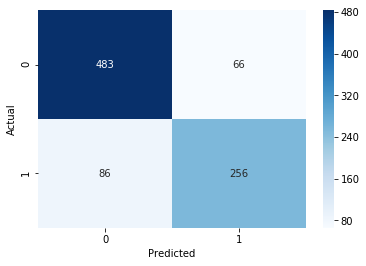

In [ ]:
### Fit model ###
accuracy_best, alpha_best, iter_best = 0., 0., 0
alphas = [0.0001, 0.0003, 0.0006, 0.0009,
          0.001,  0.003,  0.006,  0.009]
          #0.01,   0.03,   0.06,   0.09]
alphas = [0.0003]
for alpha in alphas:
    print("---------- alpha ", alpha, "----------")
    for iters in range(401, 402, 1):
        clf = SGDClassifier(loss="log", penalty="l2", max_iter=iters, alpha=alpha, random_state=0)#, class_weight={1:1.605, 0:1})
        clf.fit(train_X, train_y)
        #print(clf.coef_)
        
        ### Cross-validation ###
        cv_predictions = cross_val_predict(clf, train_X, train_y, cv=10)
        #confusion_matrix = pd.crosstab(train_y, cv_predictions, rownames=['Actual'], colnames=['Predicted'])
        #sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
        accuracies = cross_val_score(estimator = clf, X=train_X , y=train_y , cv = 10)
        accuracy_mean = accuracies.mean()
        if accuracy_mean > accuracy_best:
            accuracy_best = accuracy_mean
            alpha_best = alpha
            iter_best = iters
        print("alpha:", alpha, "iters:", iters, "Accuracy mean:", accuracies.mean(), "+/-", accuracies.std(),"\n")
        #print("Cross-validated scores:", accuracies)
#{0:1.30263, 1:0.81147}
print("The best is:", "alpha:", alpha_best, "iters:", iter_best, "Accuracy mean:", accuracy_best)
clf = SGDClassifier(loss="log", penalty="l2", max_iter=iter_best, alpha=alpha_best, random_state=0)#, class_weight={1:1.605, 0:1})
clf.fit(train_X, train_y)
cv_predictions = cross_val_predict(clf, train_X, train_y, cv=10)
confusion_matrix = pd.crosstab(train_y, cv_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
accuracies = cross_val_score(estimator = clf, X=train_X , y=train_y , cv = 10)
print("Accuracy mean:", accuracies.mean(), "+/-", accuracies.std(),"\n")
print("Cross-validated scores:", accuracies)

In [ ]:
predictions = clf.predict(test_X)
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':predictions})
submission.to_csv("submission.csv", index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
